<a href="https://colab.research.google.com/github/AmulyaDinesh/Bank-Customer-Segmentation/blob/main/sds_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as pld
import seaborn as sns
from google.colab import files
uploaded=files.upload()
data=pd.read_csv("bank_customer_segmentation.csv")

Saving bank_customer_segmentation.csv to bank_customer_segmentation (2).csv


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   days_since_last_transaction     25159 non-null  float64
 10  current_balance                 28382 non-null  float64
 11  previous_month_end_balance      28382 non-null  float64
 12  average_monthly_balance_prevQ   

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [ ]:
data.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [ ]:
print(data['gender'].value_counts())

Male      16548
Female    11309
Name: gender, dtype: int64


In [ ]:
null_gender=data['gender'].isnull()
print(null_gender)

0        False
1        False
2        False
3         True
4        False
         ...  
28377    False
28378    False
28379    False
28380    False
28381    False
Name: gender, Length: 28382, dtype: bool


In [ ]:
#Missing Data And Filling In

data.isnull()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
28378,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
28379,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
28380,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
import numpy as np
for i in range (0,28382):
  if(null_gender[i]==True):
    change=data.replace(null_gender[i],np.NaN)
    #data=(change.dropna())

In [ ]:
print(data[0:6]['gender'])

0      Male
1      Male
2      Male
3       NaN
4      Male
5    Female
Name: gender, dtype: object


In [ ]:
print(data[0:6]['gender'])    #just to check and cross verify
print(data['gender'].value_counts())
#print(change)

0      Male
1      Male
2      Male
3       NaN
4      Male
5    Female
Name: gender, dtype: object
Male      16548
Female    11309
Name: gender, dtype: int64


In [ ]:
#print(data)

In [ ]:
print(data['occupation'].value_counts())

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64


In [ ]:
null_occ=data['occupation'].isnull()
print(null_occ)

0        False
1        False
2        False
3        False
4        False
         ...  
28377    False
28378    False
28379    False
28380    False
28381    False
Name: occupation, Length: 28382, dtype: bool


In [ ]:
import numpy as np
for i in range (0,28381):
    if(null_occ[i]==True):
      change_occ=data.replace(null_occ[i],np.NaN)

In [ ]:
print(data[0:6]['occupation'])    #just to check and cross verify
print(data['occupation'].value_counts())

0    self_employed
1    self_employed
2         salaried
3    self_employed
4    self_employed
5    self_employed
Name: occupation, dtype: object
self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64


In [ ]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [ ]:
data['gender']=data['gender'].fillna('Male')

In [ ]:
data['dependents']=data['dependents'].fillna(value=data['dependents'].mean())

In [ ]:
data['occupation']=data['occupation'].fillna(value=data['occupation'].bfill())  #fills with below value

In [ ]:
data['city']=data['city'].fillna(value=data['city'].pad())  #previous value is assigned

In [ ]:
data['days_since_last_transaction']=data['days_since_last_transaction'].fillna(value=data['days_since_last_transaction'].median())

In [ ]:
data.isnull().sum()
#Since everything is zero, the data is now clean ie, all the null values are removed

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as pld
import seaborn as sns

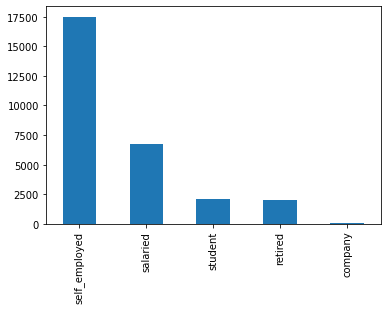

In [ ]:
df=pd.DataFrame(data)
df.occupation.value_counts().plot(kind='bar')  


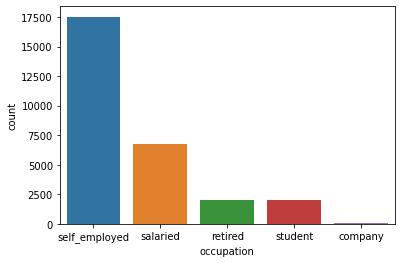

In [ ]:
#same graph using seaborn
sns.countplot(x ='occupation', data=data)

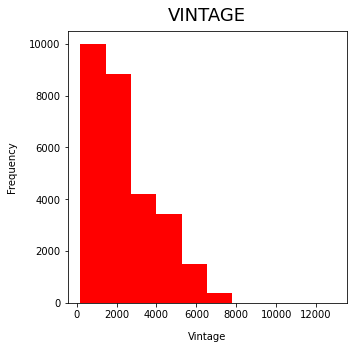

In [ ]:
import matplotlib.pyplot as plt
data['vintage'].plot(kind='hist', figsize=(5, 5),color='r');
plt.xlabel("Vintage", labelpad=12)
plt.ylabel("Frequency", labelpad=12)
plt.title("VINTAGE", y=1.015, fontsize=18);

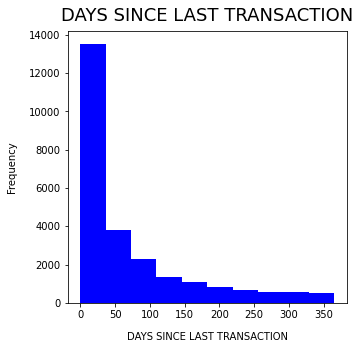

In [ ]:
data['days_since_last_transaction'].plot(kind='hist', figsize=(5, 5),color='b');
plt.xlabel("DAYS SINCE LAST TRANSACTION", labelpad=12)
plt.ylabel("Frequency", labelpad=12)
plt.title("DAYS SINCE LAST TRANSACTION", y=1.015, fontsize=18);

In [ ]:
sns.barplot(x='gender', y='dependents', data=data)
#Men have more dependents than women

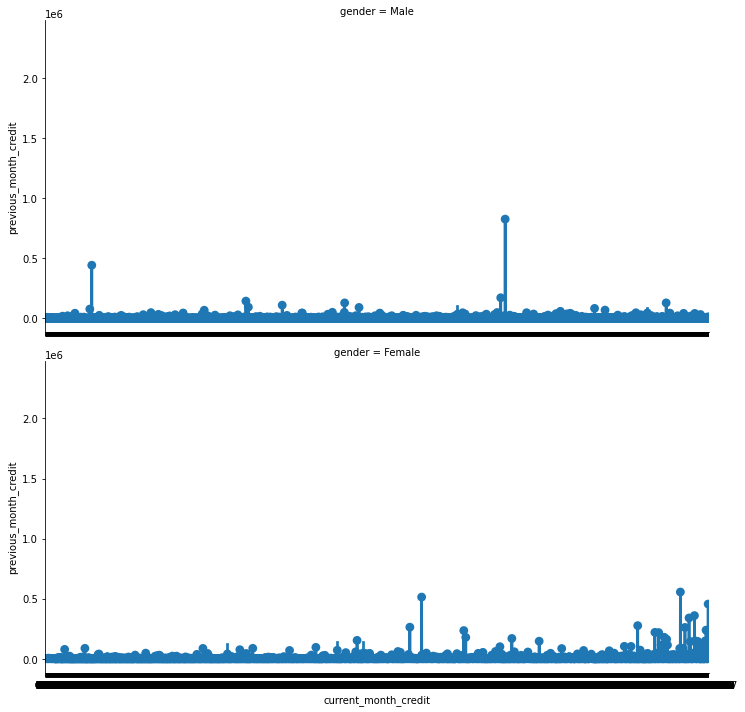

In [ ]:
FacetGrid=sns.FacetGrid(data, row='gender', height=5, aspect=2)
FacetGrid.map(sns.pointplot, 'current_month_credit', 'previous_month_credit', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [ ]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [ ]:
data['current_balance'].mean()    #MEAN OF CURRENT BALANCE

7380.551803607912

In [ ]:
data['current_balance'].median()  #MEDIAN OF CURRENT BALANCE

3281.255

In [ ]:
data['current_balance'].var()  #VARIANCE OF CURRENT BALANCE

1814650257.5186183

{'boxes': [<matplotlib.lines.Line2D at 0x7f7b9db11128>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7b9db11b38>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7b9db285f8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7b9db28278>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7b9db11438>,
  <matplotlib.lines.Line2D at 0x7f7b9db117b8>]}

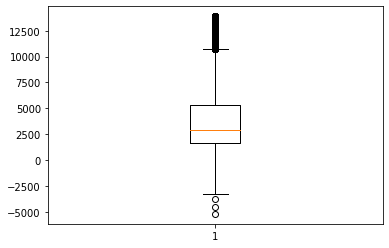

In [ ]:
import matplotlib.pyplot as plt
Q1 = data['current_balance'].quantile(0.25)
Q3 = data['current_balance'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

#removes outliers
filter = (data['current_balance'] >= Q1 - 1.5 * IQR) & (data['current_balance'] <= Q3 + 1.5 *IQR)
data_new=data.loc[filter]  
plt.boxplot(data_new.current_balance)

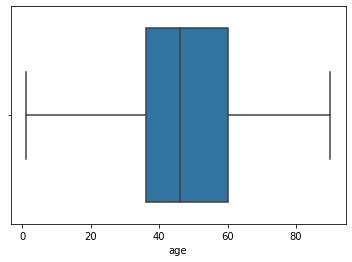

In [ ]:
sns.boxplot(x ='age', data=data)

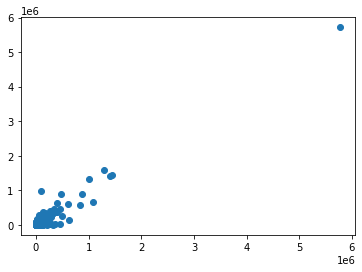

In [ ]:
df=pd.DataFrame(data)
plt.scatter(df.current_month_balance,df.previous_month_balance)       #we do not specify which is x and y
plt.show()

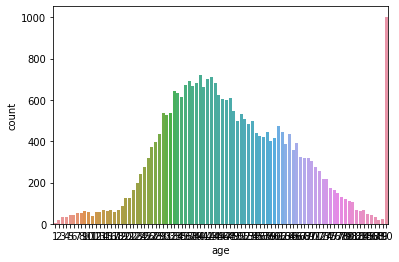

In [ ]:
sns.countplot(x='age'[0:100],data=data)

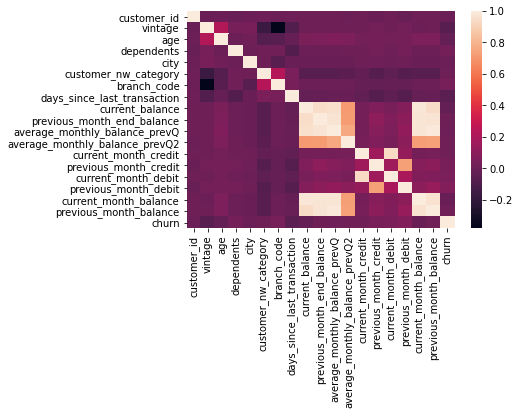

In [ ]:
# Calculate correlations
corr = data.corr()
# Heatmap
sns.heatmap(corr)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


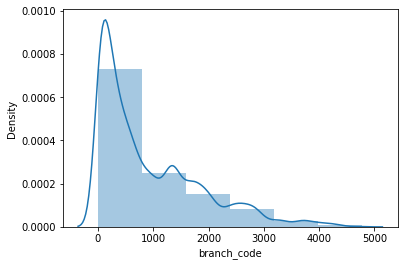

In [ ]:
sns.distplot(data['branch_code'], bins=6)

In [ ]:
#Data Cleaning Detection of outliers
from collections import Counter
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | 
                              (df[col] > Q3 + outlier_step )].index
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
   
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)  

    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   

# detect outliers from "Rating","Reviews","Size","Installs","Price","Current Ver","Android Ver"
Outliers_to_drop = detect_outliers(data,2,["vintage","current_balance","current_month_credit","previous_month_credit","average_monthly_balance_prevQ","average_monthly_balance_prevQ2","current_month_debit"])

In [ ]:
data.loc[Outliers_to_drop]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
11,13,7108,32,Male,0.000000,salaried,1096.0,1,89,20.0,6886.40,8372.64,9149.45,21007.52,7564.53,4550.24,9907.91,5161.96,8532.97,8072.33,0
94,98,8459,67,Female,0.000000,salaried,1574.0,2,1572,6.0,20741.22,18803.01,20449.11,16927.81,2780.11,2555.04,123.07,2000.03,21237.00,20533.91,0
494,528,7411,50,Male,0.000000,self_employed,1150.0,3,108,5.0,4987.93,5582.38,4625.73,4065.48,2585.79,2030.74,16032.80,2271.69,4541.48,4964.76,0
700,748,6369,42,Male,2.000000,salaried,1589.0,2,33,23.0,16704.74,16189.48,17082.13,17983.31,1083.80,1035.09,349.84,2444.32,16835.84,16769.03,0
759,810,6405,77,Male,0.000000,self_employed,1096.0,1,27,11.0,1165.51,1817.37,2923.33,10240.79,12041.84,6091.31,12693.69,7355.25,2961.10,2665.62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26284,28065,2078,41,Male,0.000000,salaried,1020.0,2,145,115.0,6797.41,14595.61,15254.19,24137.92,0.27,0.27,7749.67,1078.65,13921.99,15061.18,0
26968,28795,1279,90,Male,0.000000,self_employed,334.0,2,141,18.0,7762.52,15809.34,27693.16,45823.22,1100.36,1028.93,10060.03,24286.07,13208.42,30471.09,1
27351,29205,182,90,Male,0.347236,self_employed,1020.0,2,1573,80.0,722.29,72150.86,57372.33,50593.82,0.70,0.70,71429.27,0.70,27815.88,72150.86,1
27357,29211,2775,38,Male,2.000000,self_employed,575.0,1,176,19.0,10861.64,160847.99,112080.65,35786.10,1443.19,1386.04,158571.76,2580.33,63542.90,158048.34,0


In [ ]:
train = data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [ ]:
#HYPOTHESES TESTING 1
#Lets say we consider the following hypotheses
#NULL HYPOTHESES: The number of dependents doesn't have an impact on the current balance
#ALTERNATE HYPOTHESES: The number of dependents has an impact on the current balance

In [ ]:
no_imp = np.array([np.mean(data[data["dependents"]==0].sample(20)["current_balance"].values) for i in range(100)])
yes_imp = np.array([np.mean(data[data["dependents"]==1].sample(20)["current_balance"].values) for i in range(100)])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


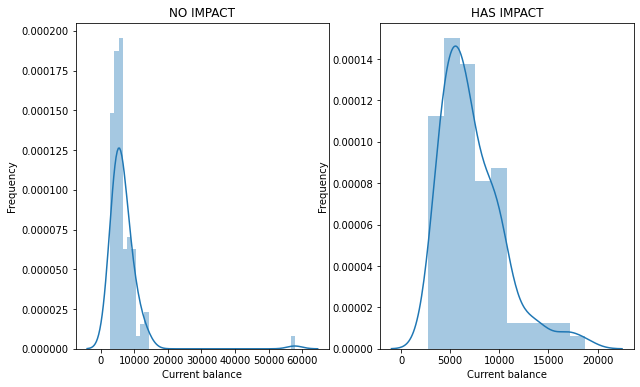

In [ ]:
plt.subplots(1, 2, figsize = (10, 6))
plt.subplot(1,2, 1)
sns.distplot(no_imp)
plt.title("NO IMPACT")
plt.xlabel("Current balance")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
sns.distplot(yes_imp)
plt.title("HAS IMPACT")
plt.xlabel("Current balance")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Calculating the z score
effect = np.mean(no_imp) - np.mean(yes_imp)
sigma_noimp = np.std(no_imp)    #np.std calculates the standarad deviation
sigma_yesimp = np.std(yes_imp)
sigma_difference = np.sqrt((sigma_noimp**2)/len(no_imp)  +  (sigma_yesimp**2)/len(yes_imp))
z_score = effect / sigma_difference
z_score

-0.2291572601121453

In [ ]:
from scipy import stats

#To find p-value (2 tailed test)
p_value=stats.norm.sf(abs(z_score))*2
p_value

0.8187466901809284

In [ ]:
#Setting significance level to 0.05:
p_value<0.05

False

In [ ]:
#Since p value is greater than the significance level, we do not reject the null hypotheses.
#The null hypotheses is plausible

In [ ]:
#HYPOTHESES TESTING 2
#Lets say we consider the following hypotheses
#NULL HYPOTHESES: Churn doesn't have an impact on previous month credit
#ALTERNATE HYPOTHESES: Churn has an impact on previous month credit

In [ ]:
import numpy as np
no_imp = np.array([np.mean(data[data["churn"]==0].sample(20)["previous_month_credit"].values) for i in range(100)])
yes_imp = np.array([np.mean(data[data["churn"]==1].sample(20)["previous_month_credit"].values) for i in range(100)])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


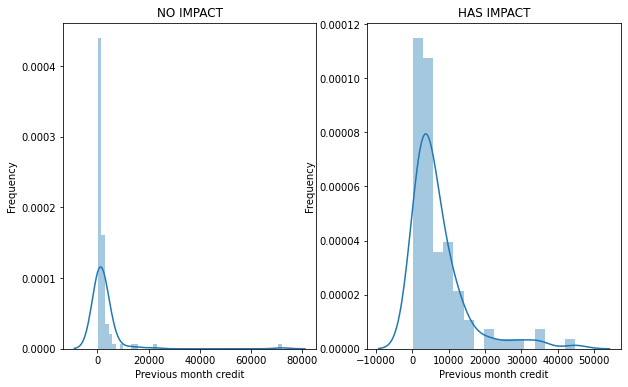

In [ ]:
plt.subplots(1, 2, figsize = (10, 6))
plt.subplot(1,2, 1)
sns.distplot(no_imp)
plt.title("NO IMPACT")
plt.xlabel("Previous month credit")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
sns.distplot(yes_imp)
plt.title("HAS IMPACT")
plt.xlabel("Previous month credit")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Calculating the z score
effect = np.mean(no_imp) - np.mean(yes_imp)
sigma_noimp = np.std(no_imp)
sigma_yesimp = np.std(yes_imp)
sigma_difference = np.sqrt((sigma_noimp**2)/len(no_imp)  +  (sigma_yesimp**2)/len(yes_imp))
z_score = effect / sigma_difference
z_score

-4.978681280752458

In [ ]:
from scipy import stats

#To find p-value (2 tailed test)
p_value=stats.norm.sf(abs(z_score))*2
p_value

6.401896426907659e-07

In [ ]:
#Setting significance level to 0.05:
p_value<0.05


True

In [ ]:
#Since p value is less than 0.05(significance level), we reject the null hypotheses
#Thus, we can conclude that churn has an impact on the previous month credit

In [ ]:
newdata = data.drop(data.columns[0],axis=1)
print("\nMean :-\n")
mean=newdata.mean()
print(mean)
print("\nvariance-\n")
var=newdata.var()
print(var)
newdata


Mean :-

vintage                           2364.336446
age                                 48.208336
dependents                           0.347236
city                               796.312170
customer_nw_category                 2.225530
branch_code                        925.975019
days_since_last_transaction         65.455747
current_balance                   7380.551804
previous_month_end_balance        7495.770548
average_monthly_balance_prevQ     7496.779856
average_monthly_balance_prevQ2    7124.209162
current_month_credit              3433.252240
previous_month_credit             3261.694458
current_month_debit               3658.744549
previous_month_debit              3339.761353
current_month_balance             7451.132765
previous_month_balance            7495.177129
churn                                0.185329
dtype: float64

variance-

vintage                           2.592501e+06
age                               3.170951e+02
dependents                        9.08948

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,3135,66,Male,0.000000,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,310,35,Male,0.000000,self_employed,187.0,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,2356,31,Male,0.000000,salaried,146.0,2,41,30.0,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,478,90,Male,0.347236,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,2531,42,Male,2.000000,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,1845,10,Female,0.000000,student,1020.0,2,1207,70.0,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,4919,34,Female,0.000000,self_employed,1046.0,2,223,14.0,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,297,47,Male,0.000000,salaried,1096.0,2,588,0.0,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,2585,50,Male,3.000000,self_employed,1219.0,3,274,30.0,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


In [ ]:
newset=data.drop(data.columns[0],axis=1)
x_data=newset[['vintage','age','dependents','city','customer_nw_category','branch_code','days_since_last_transaction','current_balance','previous_month_end_balance','average_monthly_balance_prevQ','average_monthly_balance_prevQ2','current_month_credit','previous_month_credit','current_month_debit','previous_month_debit','current_month_balance','previous_month_balance','churn']]
x_data=x_data.apply(lambda x:(x-x.mean(axis=0))/x.std(axis=0))
print("\nmean after normalisation-\n")
print(x_data.mean())
print("\n variance after normalisation: \n")
print(x_data.var())
x_data


mean after norm-

vintage                           1.079933e-17
age                              -3.846781e-17
dependents                       -1.013780e-15
city                             -2.936916e-17
customer_nw_category             -6.977092e-16
branch_code                      -4.207050e-17
days_since_last_transaction       4.295547e-16
current_balance                   2.069508e-16
previous_month_end_balance        1.038827e-15
average_monthly_balance_prevQ     2.264942e-16
average_monthly_balance_prevQ2   -1.008098e-17
current_month_credit             -7.799285e-16
previous_month_credit            -7.381695e-16
current_month_debit              -6.614539e-16
previous_month_debit             -1.889916e-16
current_month_balance             5.793133e-16
previous_month_balance            9.691685e-16
churn                             8.479660e-16
dtype: float64

 var : 

vintage                           1.0
age                               1.0
dependents                        

,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,0.478636,0.999130,-3.642122e-01,-1.407888,-0.341483,-0.182315,1.926993,-0.139015,-0.141950,-0.144707,-0.127314,-0.044544,-0.109856,-0.070376,-0.137424,-0.142562,-0.142262,-0.476950
1,-1.275887,-0.741743,-3.642122e-01,-1.407888,-0.341483,2.439782,-0.066311,-0.046719,0.028425,0.007249,0.118791,-0.044539,-0.109844,0.035155,-0.133294,-0.022704,0.030459,-0.476950
2,-0.005178,-0.966372,-3.642122e-01,-1.502623,-0.341483,-0.943672,-0.430939,-0.081397,-0.039513,-0.061990,-0.096650,-0.044538,-0.109842,0.045936,-0.126765,-0.058164,-0.057151,-0.476950
3,-1.171547,2.346902,-3.085932e-15,0.516857,-0.341483,-0.366790,0.991113,-0.119455,-0.122359,-0.129708,-0.137242,-0.044540,-0.109847,-0.070371,-0.049234,-0.122739,-0.137288,2.096584
4,0.103510,-0.348643,1.733569e+00,1.612090,1.172651,-0.573657,-0.090619,-0.151480,-0.143290,-0.140283,-0.117846,-0.044542,-0.085793,-0.059057,-0.074141,-0.149736,-0.137114,2.096584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,-0.322544,-2.145672,-3.642122e-01,0.516857,-0.341483,0.299664,0.055232,-0.147989,-0.150939,-0.124972,-0.097284,-0.044542,-0.109852,-0.070374,-0.137420,-0.151656,-0.151271,-0.476950
28378,1.586625,-0.797900,-3.642122e-01,0.576933,-0.341483,-0.749601,-0.625408,-0.083018,-0.080569,-0.091740,-0.073104,-0.044524,-0.109785,-0.053048,-0.095703,-0.088324,-0.089670,-0.476950
28379,-1.283961,-0.067857,-3.642122e-01,0.692464,-0.341483,-0.360392,-0.795568,1.364629,1.258467,1.101179,0.332055,0.016006,0.020929,-0.067144,-0.134478,1.275811,1.179984,2.096584
28380,0.137048,0.100615,2.782460e+00,0.976670,1.172651,-0.695218,-0.430939,-0.135098,-0.138028,-0.139327,-0.118154,-0.044544,-0.109856,-0.070376,-0.137424,-0.138592,-0.138330,-0.476950


In [ ]:
#CORRELATION
def corr_coeff(df,x,y):
    # we need to calculate the means of the 2 columns
    x_bar = df[x].mean()
    y_bar = df[y].mean()
    
    # we need to calculate the sample deviation
    x_sd = df[x].std()
    y_sd = df[y].std()
    
    total_prod = (((df[x]-x_bar)/x_sd)*((df[y]-y_bar)/y_sd)).sum()
    corr = total_prod/(df.shape[0]-1)
    
    return corr

In [ ]:
corr_coeff(data,'days_since_last_transaction','previous_month_credit')

-0.06741365032080225

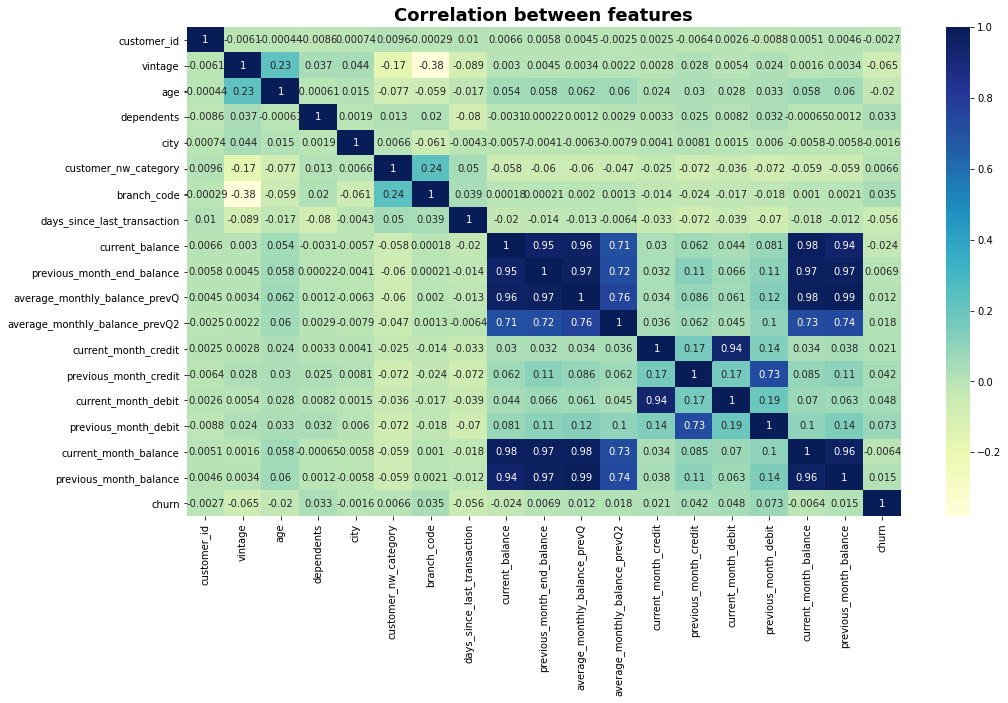

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
data_corr=data.corr()
f,ax=plt.subplots(figsize=(16,9))
sns.heatmap(data_corr,cmap='YlGnBu',annot=True)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()